# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def d(*obj):
    for o in obj:
        display(o)

def p(*obj):
    for o in obj:
        print(o)

def _np(ls):
    return np.array(ls)

In [2]:
import sys
sys.path.append('../qwok/')
from visualization import Visualization as Vis
from signal_oscillator import Price_Oscillator_Signal
from OEVTN import BacktestHandler

# Config

In [3]:
'''
{'Oil': ['USO'],
 'Electric Vehicle': ['TSLA', 'NIO', 'LI', 'XPEV'],
 'Cruise': ['CCL', 'RCL', 'NCLH'],
 'Airline': ['DAL', 'LUV', 'UAL', 'AAL', 'ALK', 'CPA'],
 'Transportation': ['XTN', 'ODFL', 'XPO', 'KNX', 'SNDR', 'WERN', 'RXO'],
 'Energy': ['XLE', 'XOM', 'CVX', 'BP', 'PBR', 'E', 'CVE']}

 ['Close Price Return', 'Extrema', 'Close vs SMA(Close)', 'Open vs SMA(Open)', 'Gap']
'''

ticker = 'AAL'
sector = 'TN' # EV | TN
start, end = '2021-12-08', '2023-12-08'
method_position = 1
strategy = 'Extrema' # 'Close Price Return', 'Extrema', 'Close vs SMA(Close)', 'Open vs SMA(Open)', 'Gap'


handler = BacktestHandler(start, end)
df_oil = handler.df_oil
df = handler.getData(ticker)
dict_sector_positionts = handler.dict_sector_positionts

# Review

In [4]:
vis_obj = Vis(close=df['Close'],
              position=dict_sector_positionts[sector][strategy],
              open=df['Open'],
              method_position=method_position,
              asset_name=ticker,
              extend_position=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


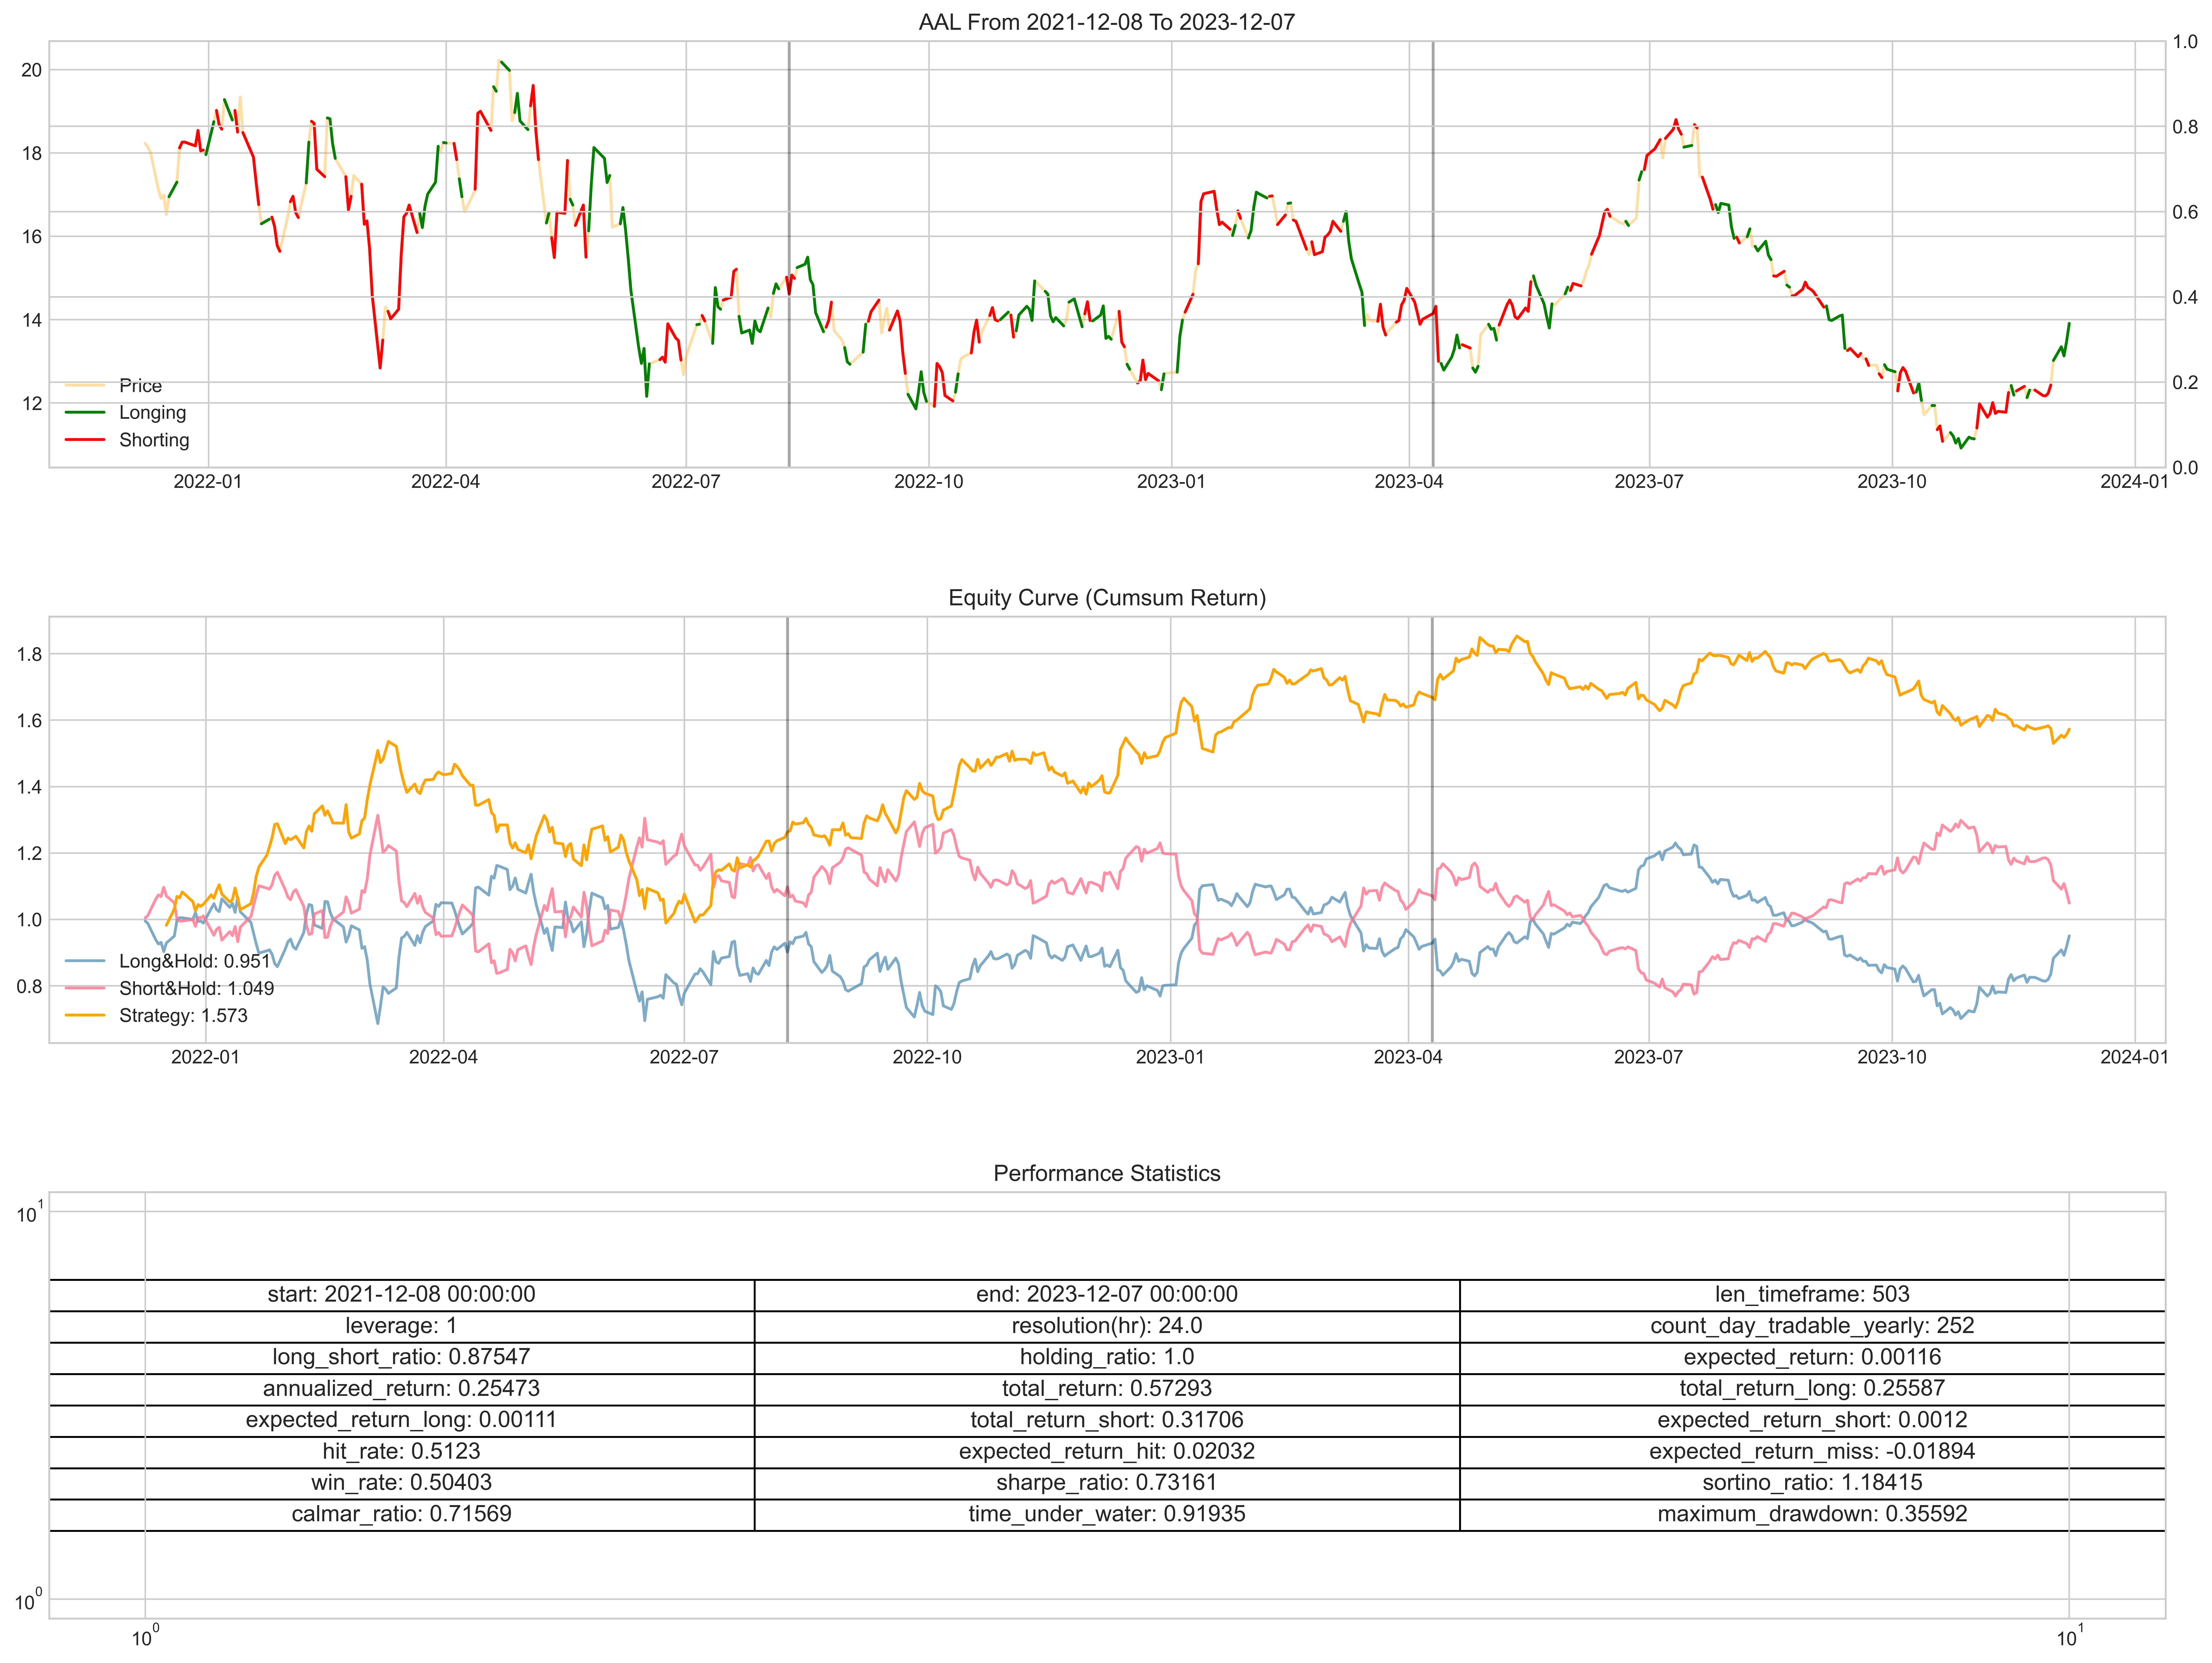

In [5]:
vis_obj.plot_general(config_position={'plot':False, 'dpi':500, 'figsize':(20, 15)})

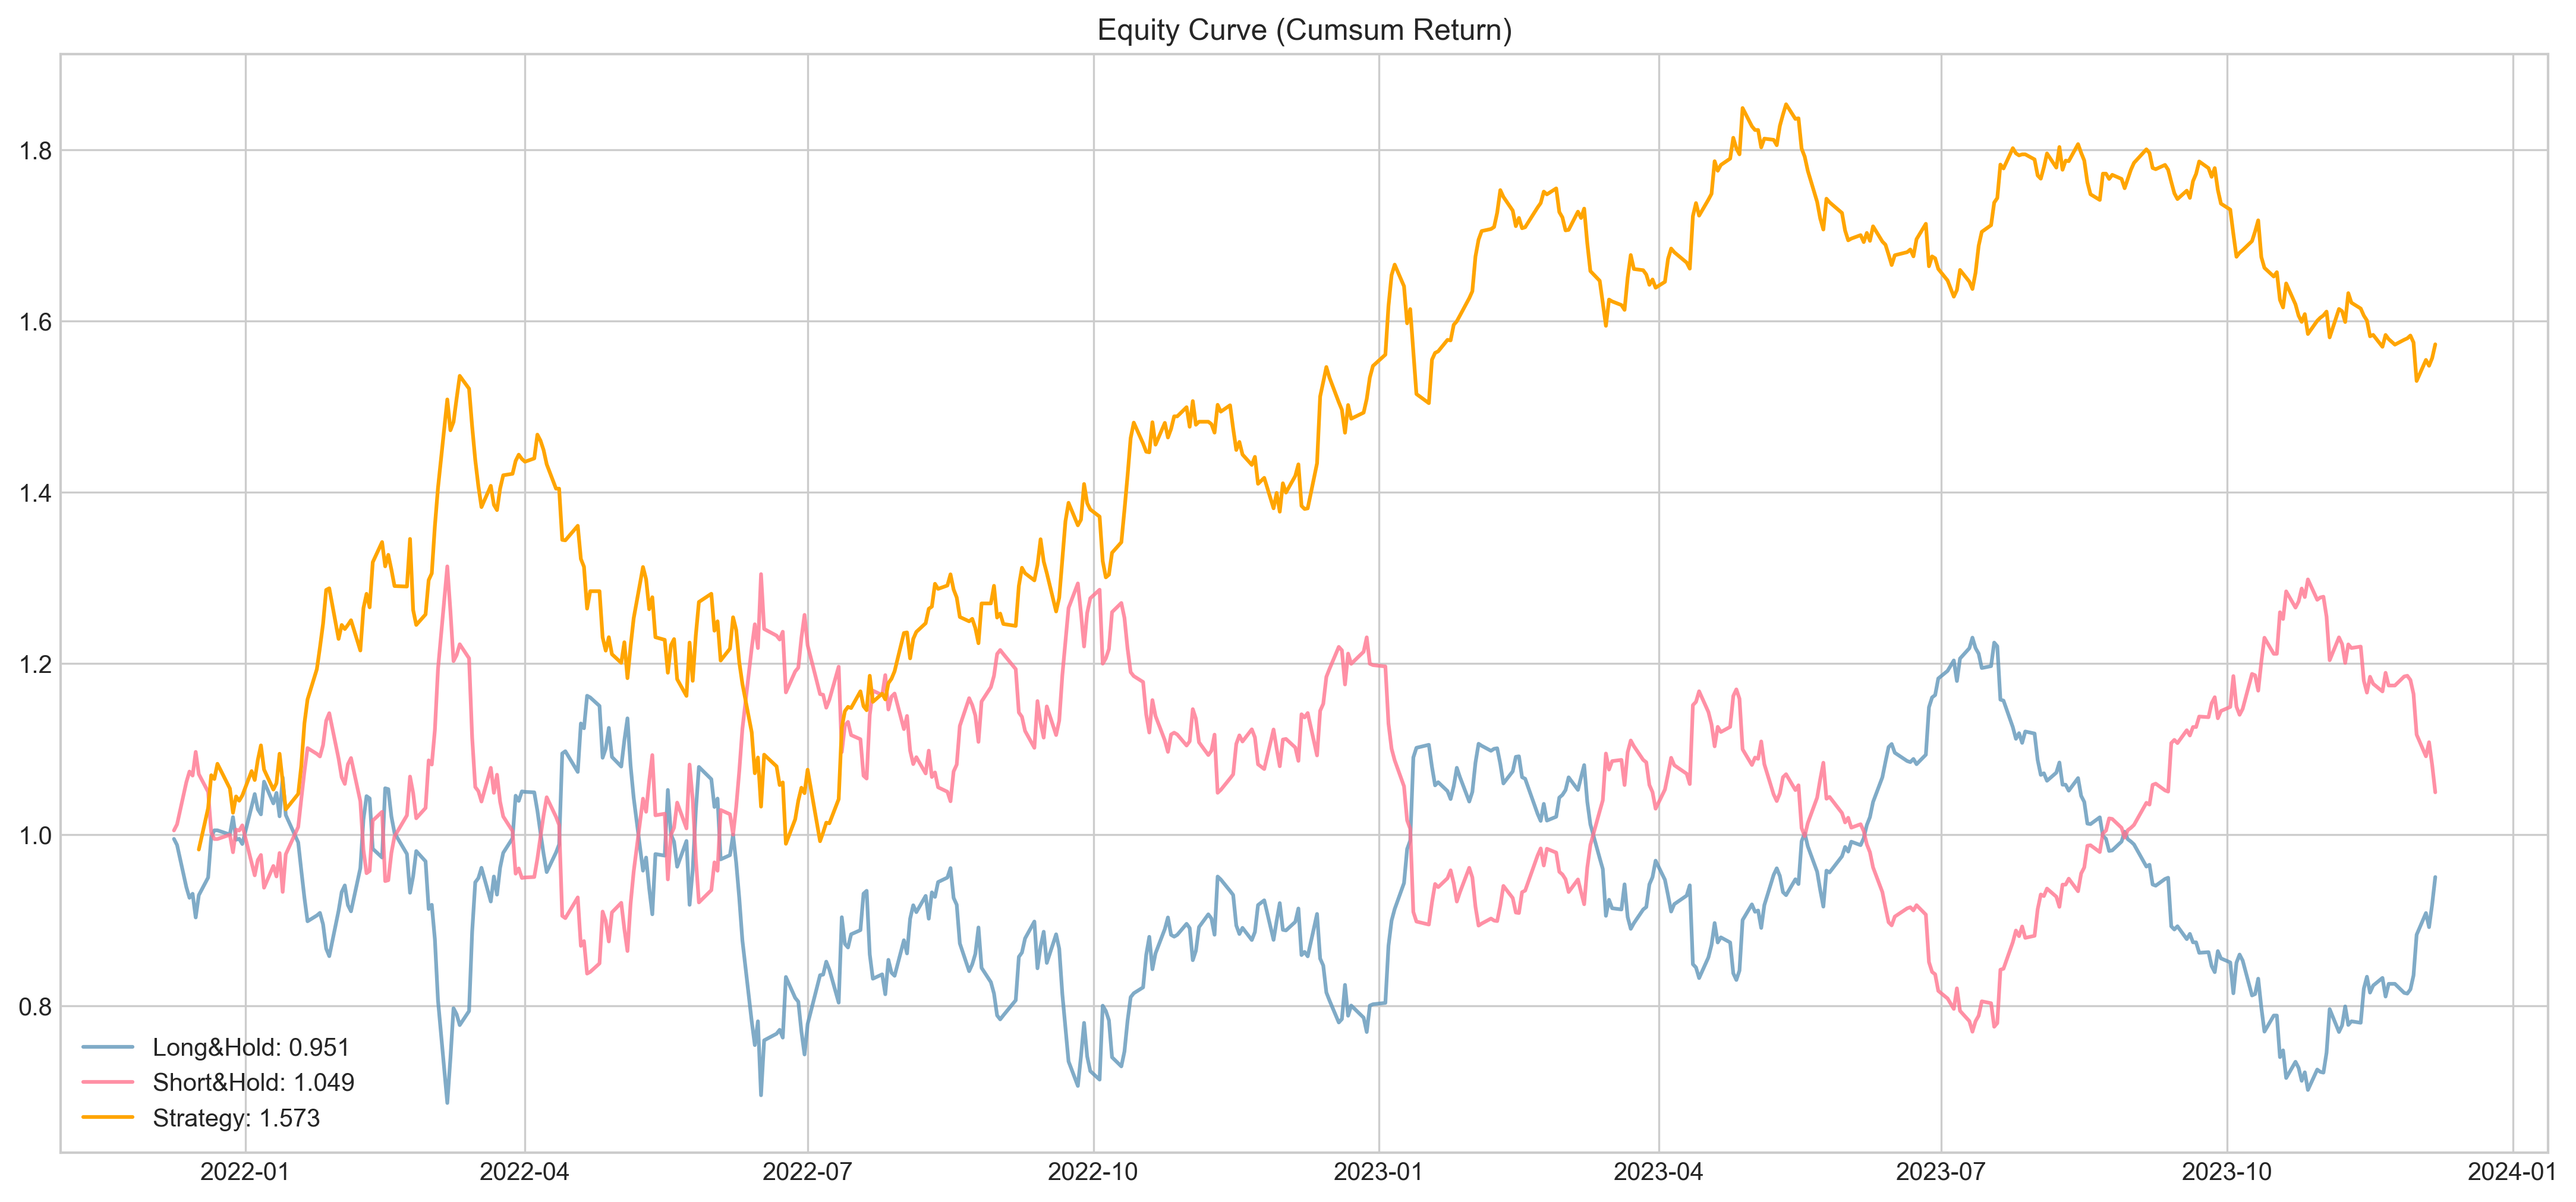

In [6]:
vis_obj.plot_equityCurve()

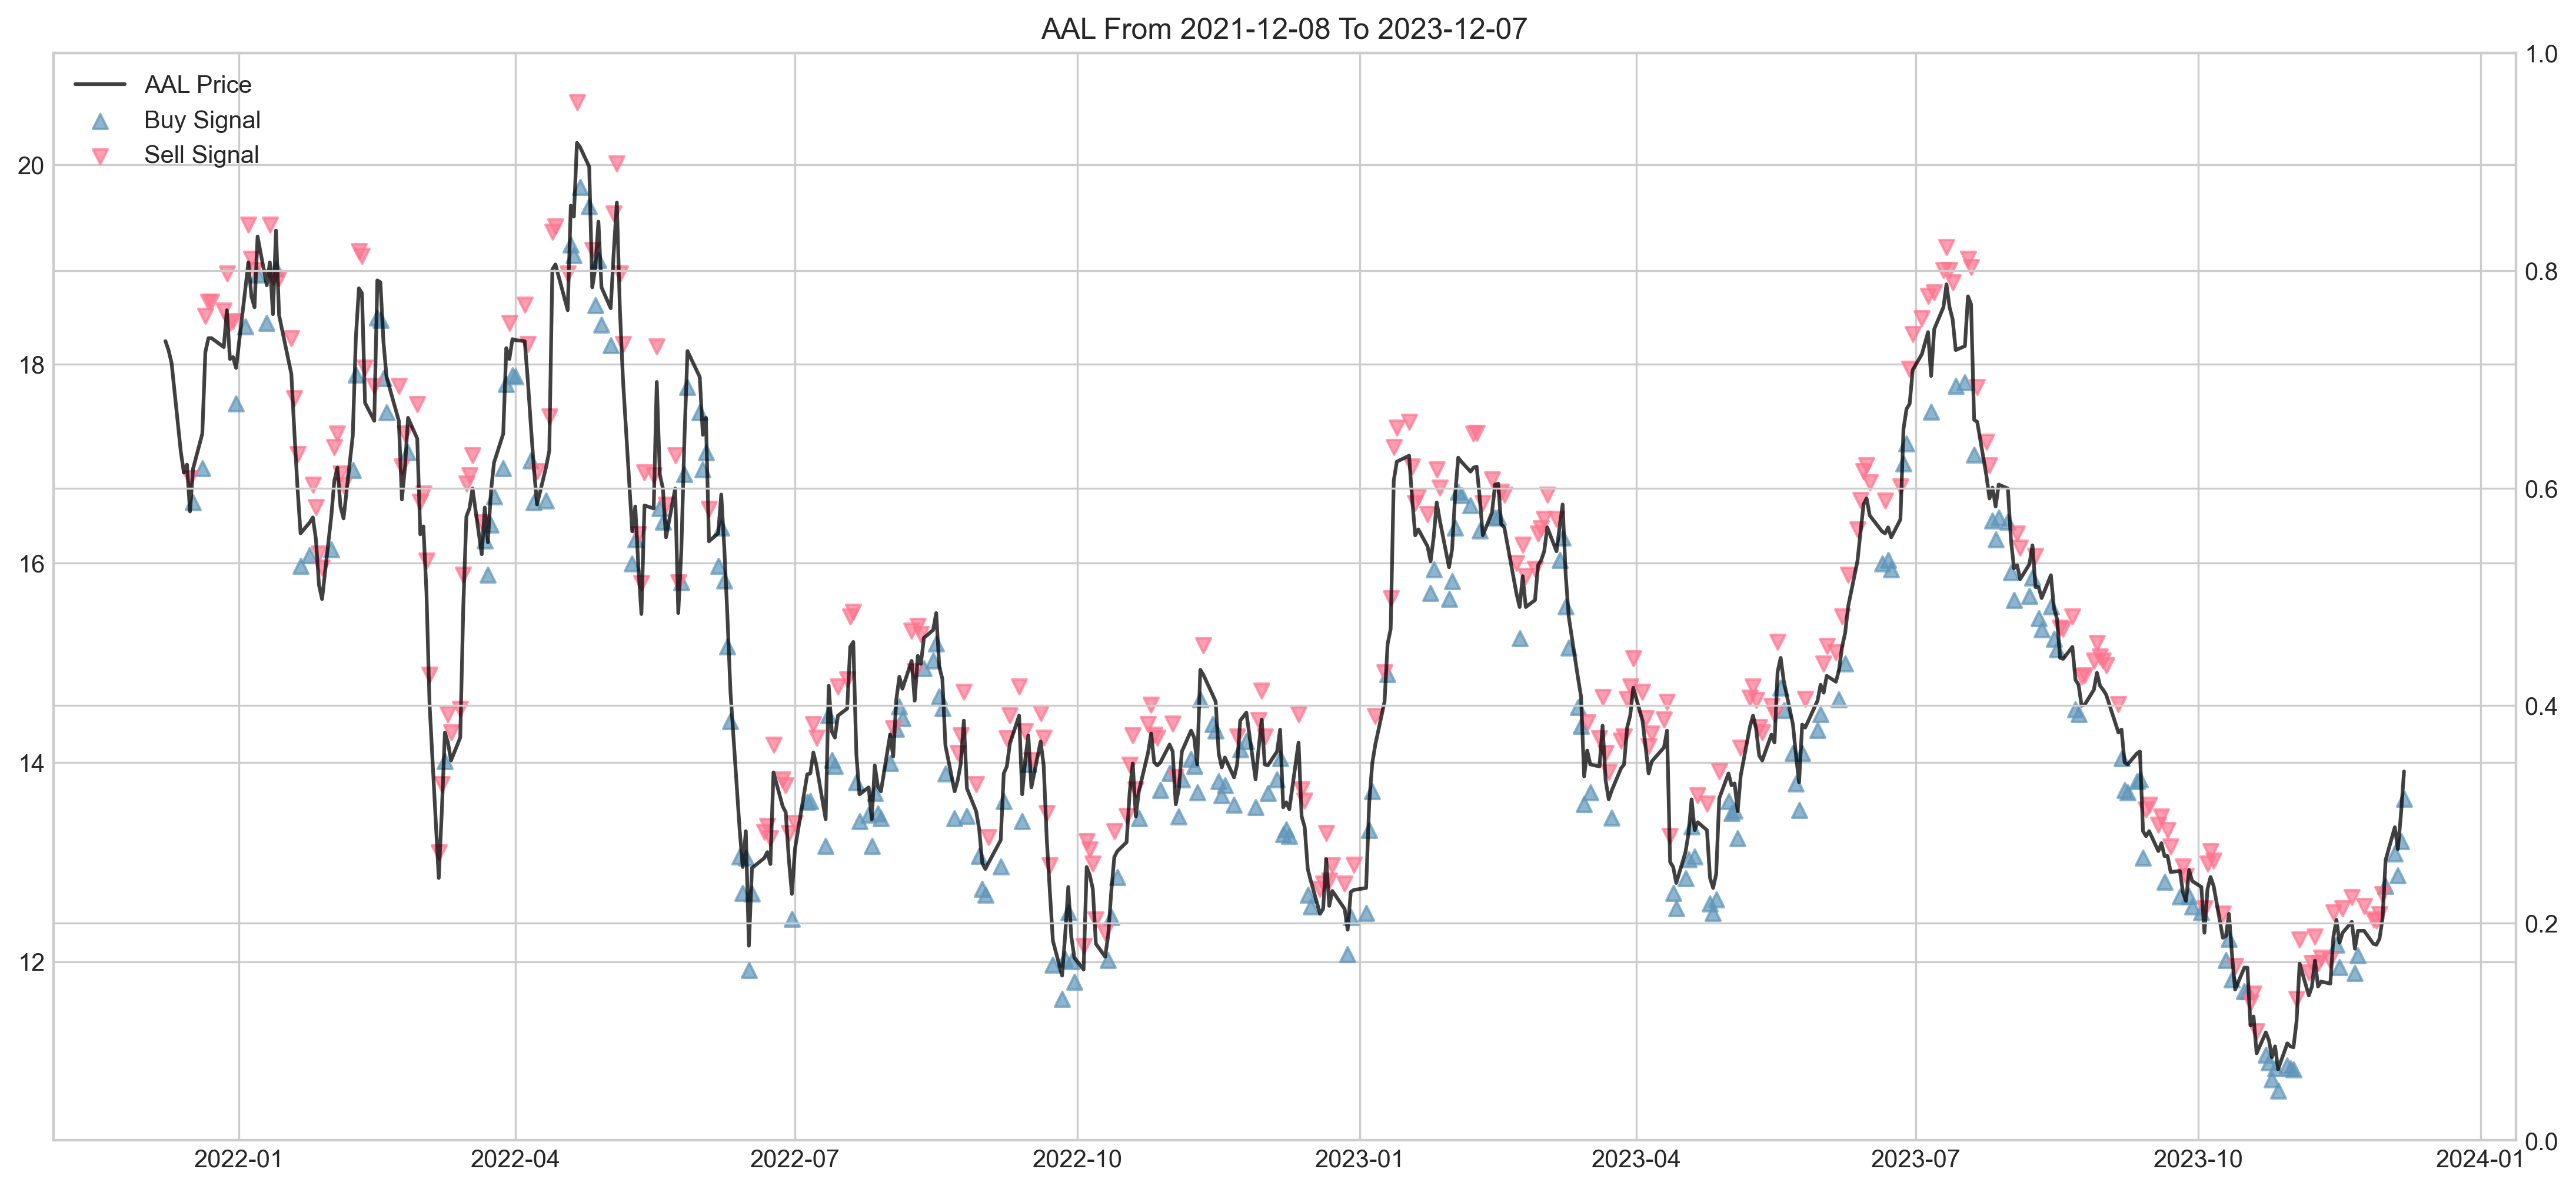

In [7]:
vis_obj.plot_signal()

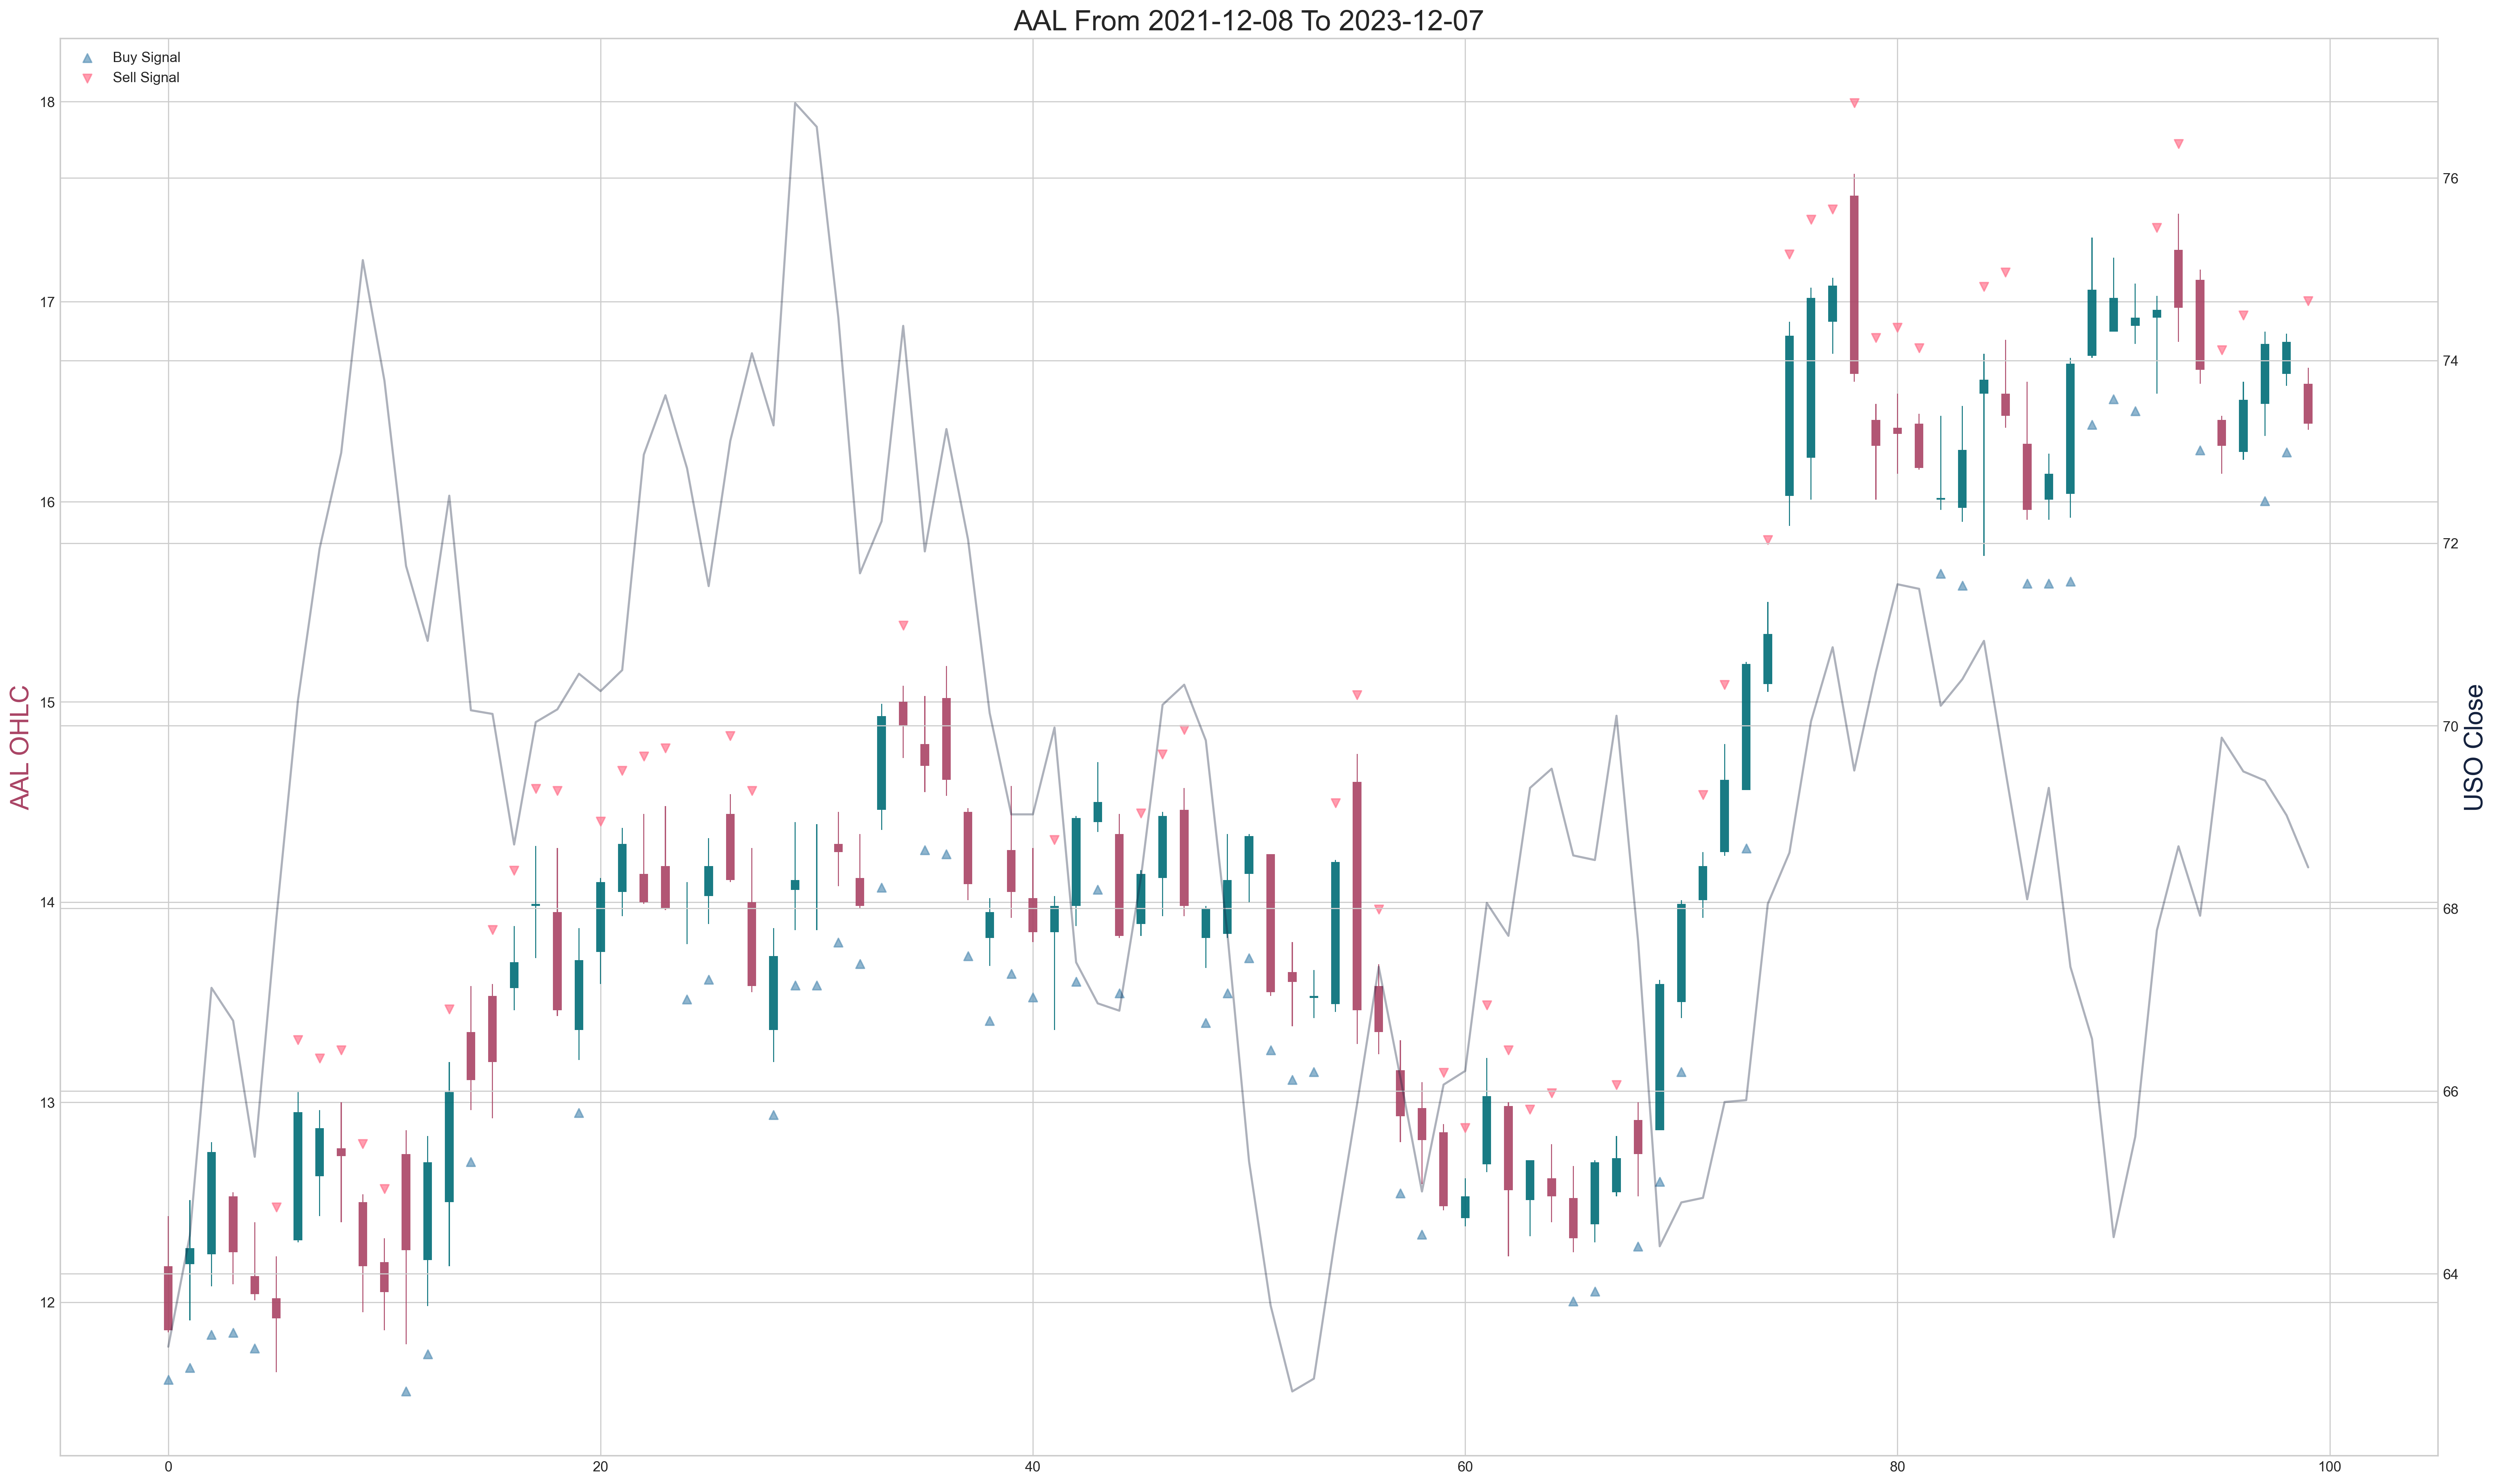

In [8]:
temp = pd.concat([
                df[['Open', 'High', 'Low', 'Close']],
                df_oil['Close'].rename('USO Close'),
                vis_obj.position
                ], axis=1)
temp = temp.iloc[200:300]
vis_obj.plot_ohlc_ta_position(temp)

# Sector Performance

In [9]:
df_result_raw = pd.read_excel('Result/Result.xlsx', index_col=0)
df_result = df_result_raw.loc[df_result_raw['Sector']!='Oil']
df_result.head()

start        end  len_timeframe  leverage  resolution(hr)  \
欄1                                                                  
8  2021-12-08 2023-12-07            503         1              24   
9  2021-12-08 2023-12-07            503         1              24   
10 2021-12-08 2023-12-07            503         1              24   
11 2021-12-08 2023-12-07            503         1              24   
12 2021-12-08 2023-12-07            503         1              24   

    count_day_tradable_yearly  long_short_ratio  holding_ratio  \
欄1                                                               
8                         252           1.21145        0.99801   
9                         252           1.21145        0.99801   
10                        252           1.14224        1.00000   
11                        252           1.14224        1.00000   
12                        252           1.15880        1.00000   

    expected_return  annualized_return  ...  win_rate  sharpe_ratio  \
欄1                                      ...                           
8           0.00003            0.00827  ...   0.48406       0.01358   
9          -0.00090           -0.26001  ...   0.48805      -0.43001   
10          0.00016            0.04010  ...   0.48992       0.06755   
11         -0.00012           -0.03121  ...   0.49194      -0.05906   
12         -0.00122           -0.37986  ...   0.47809      -0.50273   

    calmar_ratio  time_under_water  maximum_drawdown             Strategy  \
欄1                                                                          
8        0.00882           0.96614           0.93801   Close Price Return   
9       -0.29533           0.99801           0.88042   Close Price Return   
10       0.05329           0.98992           0.75240              Extrema   
11      -0.03734           0.98992           0.83588              Extrema   
12      -0.47995           0.98008           0.79146  Close vs SMA(Close)   

    Method Position  Ticker            Sector  PoC  
欄1                                                  
8                 0    TSLA  Electric Vehicle  NaN  
9                 1    TSLA  Electric Vehicle  NaN  
10                0    TSLA  Electric Vehicle  NaN  
11                1    TSLA  Electric Vehicle  NaN  
12                0    TSLA  Electric Vehicle  NaN  

[5 rows x 28 columns]

In [10]:
round(df_result.groupby(['Sector'])['sharpe_ratio'].describe(), 3)

count   mean    std    min    25%    50%    75%    max
Sector                                                                  
Airline            48.0  0.421  0.716 -0.945 -0.079  0.330  0.955  2.160
Cruise             24.0  0.458  0.787 -0.690 -0.324  0.548  1.171  1.488
Electric Vehicle   32.0 -0.124  0.458 -0.988 -0.465 -0.043  0.153  0.704
Energy             56.0 -0.211  0.900 -2.247 -0.870 -0.147  0.537  1.269
Transportation     56.0  0.060  0.717 -2.118 -0.247  0.079  0.577  1.159

In [11]:
round(df_result.loc[df_result['sharpe_ratio']>=0].groupby('Strategy')['sharpe_ratio'].describe(), 3)

count   mean    std    min    25%    50%    75%    max
Strategy                                                                   
Close Price Return    21.0  0.220  0.173  0.014  0.070  0.210  0.289  0.708
Close vs SMA(Close)   43.0  0.742  0.356  0.063  0.480  0.723  1.016  1.488
Extrema               18.0  0.418  0.241  0.008  0.277  0.447  0.550  0.859
Gap                   16.0  1.083  0.573  0.133  0.620  1.076  1.339  2.160
Open vs SMA(Open)     21.0  0.747  0.438  0.096  0.398  0.775  1.102  1.468

# Ticker Review

In [12]:
df_result = df_result_raw.loc[df_result_raw['Ticker']=='TSLA']
df_result

start        end  len_timeframe  leverage  resolution(hr)  \
欄1                                                                  
8  2021-12-08 2023-12-07            503         1              24   
9  2021-12-08 2023-12-07            503         1              24   
10 2021-12-08 2023-12-07            503         1              24   
11 2021-12-08 2023-12-07            503         1              24   
12 2021-12-08 2023-12-07            503         1              24   
13 2021-12-08 2023-12-07            503         1              24   
14 2021-12-08 2023-12-07            503         1              24   
15 2021-12-08 2023-12-07            503         1              24   

    count_day_tradable_yearly  long_short_ratio  holding_ratio  \
欄1                                                               
8                         252           1.21145        0.99801   
9                         252           1.21145        0.99801   
10                        252           1.14224        1.00000   
11                        252           1.14224        1.00000   
12                        252           1.15880        1.00000   
13                        252           1.15880        1.00000   
14                        252           1.25112        1.00000   
15                        252           1.26126        1.00000   

    expected_return  annualized_return  ...  win_rate  sharpe_ratio  \
欄1                                      ...                           
8           0.00003            0.00827  ...   0.48406       0.01358   
9          -0.00090           -0.26001  ...   0.48805      -0.43001   
10          0.00016            0.04010  ...   0.48992       0.06755   
11         -0.00012           -0.03121  ...   0.49194      -0.05906   
12         -0.00122           -0.37986  ...   0.47809      -0.50273   
13         -0.00162           -0.56968  ...   0.48207      -0.77363   
14         -0.00097           -0.28295  ...   0.48406      -0.46063   
15         -0.00063           -0.17487  ...   0.49203      -0.30246   

    calmar_ratio  time_under_water  maximum_drawdown             Strategy  \
欄1                                                                          
8        0.00882           0.96614           0.93801   Close Price Return   
9       -0.29533           0.99801           0.88042   Close Price Return   
10       0.05329           0.98992           0.75240              Extrema   
11      -0.03734           0.98992           0.83588              Extrema   
12      -0.47995           0.98008           0.79146  Close vs SMA(Close)   
13      -0.64652           0.98406           0.88115  Close vs SMA(Close)   
14      -0.46954           0.98207           0.60261    Open vs SMA(Open)   
15      -0.20377           0.99004           0.85817                  Gap   

    Method Position  Ticker            Sector  PoC  
欄1                                                  
8                 0    TSLA  Electric Vehicle  NaN  
9                 1    TSLA  Electric Vehicle  NaN  
10                0    TSLA  Electric Vehicle  NaN  
11                1    TSLA  Electric Vehicle  NaN  
12                0    TSLA  Electric Vehicle  NaN  
13                1    TSLA  Electric Vehicle  NaN  
14                1    TSLA  Electric Vehicle  NaN  
15                1    TSLA  Electric Vehicle  NaN  

[8 rows x 28 columns]

# QC

In [13]:
print(ticker, sector, start, end, method_position, strategy)

AAL TN 2021-12-08 2023-12-08 1 Extrema


In [14]:
pd.concat([vis_obj.df_bt, df_oil], axis=1).tail(20)

Open  Close    Return  Position       PnL       Open       High  \
Time                                                                           
2023-11-09  12.16  11.75 -0.033717      -1.0  0.033717  70.750000  71.660004   
2023-11-10  11.67  11.80  0.011140      -1.0 -0.011140  71.309998  72.220001   
2023-11-13  11.70  11.78  0.006838      -1.0 -0.006838  71.809998  72.959999   
2023-11-14  12.15  12.25  0.008230      -1.0 -0.008230  73.230003  74.040001   
2023-11-15  12.35  12.42  0.005668       1.0 -0.005668  71.809998  72.379997   
2023-11-16  12.42  12.19 -0.018519       1.0 -0.018519  69.610001  69.709999   
2023-11-17  12.27  12.29  0.001630      -1.0  0.001630  69.139999  70.949997   
2023-11-20  12.23  12.40  0.013900      -1.0 -0.013900  72.180000  73.070000   
2023-11-21  12.30  12.13 -0.013821       1.0  0.013821  72.059998  72.589996   
2023-11-22  12.37  12.31 -0.004850       1.0 -0.004850  69.279999  71.900002   
2023-11-24  12.39  12.31 -0.006457      -1.0 -0.006457  70.949997  71.860001   
2023-11-27  12.25  12.18 -0.005714      -1.0  0.005714  70.300003  71.089996   
2023-11-28  12.19  12.17 -0.001641      -1.0  0.001641  70.639999  71.830002   
2023-11-29  12.27  12.23 -0.003260      -1.0  0.003260  72.120003  72.870003   
2023-11-30  12.33  12.43  0.008110      -1.0 -0.008110  73.500000  74.209999   
2023-12-01  12.46  13.02  0.044944       1.0 -0.044944  70.930000  71.589996   
2023-12-04  13.03  13.35  0.024559       1.0  0.024559  68.660004  69.769997   
2023-12-05  13.22  13.13 -0.006808       1.0 -0.006808  68.739998  69.239998   
2023-12-06  13.36  13.48  0.008982       1.0  0.008982  65.980003  66.349998   
2023-12-07  13.69  13.91  0.016070       1.0  0.016070  65.650002  65.739998   

                  Low      Close   Volume  Gap  SMA10(Open)  SMA10(Close)  
Time                                                                       
2023-11-09  70.139999  70.250000  4327700    1    74.883000     74.236001  
2023-11-10  71.120003  71.790001  3754400    1    74.252000     73.579001  
2023-11-13  71.769997  72.919998  3075600    1    73.709000     73.266000  
2023-11-14  72.360001  72.690002  2688500    1    73.411000     73.033001  
2023-11-15  71.180000  71.339996  5002800   -1    72.925999     72.692001  
2023-11-16  67.449997  68.050003  6745900   -1    72.395999     71.879001  
2023-11-17  69.139999  70.750000  5921000    1    71.780999     71.469001  
2023-11-20  71.940002  72.300003  3985400    1    71.409999     71.208001  
2023-11-21  71.750000  72.529999  2543500   -1    71.316999     71.281001  
2023-11-22  68.809998  71.610001  5283900   -1    71.117999     71.423000  
2023-11-24  70.750000  70.820000  1453900   -1    71.137999     71.480000  
2023-11-27  69.540001  69.959999  4633000   -1    71.037000     71.297000  
2023-11-28  70.239998  71.260002  2508200    1    70.920000     71.131001  
2023-11-29  70.599998  72.519997  4573000    1    70.809000     71.114000  
2023-11-30  70.029999  70.139999  9702200    1    70.978000     70.994000  
2023-12-01  69.040001  69.239998  4353000    1    71.110000     71.113000  
2023-12-04  67.870003  68.470001  5104000   -1    71.062000     70.885000  
2023-12-05  67.470001  67.580002  4833500    1    70.718000     70.413000  
2023-12-06  64.610001  64.760002  9506200   -1    70.110001     69.636000  
2023-12-07  64.349998  65.110001  4561900    1    69.747001     68.986000